# Car Price Prediction

**Contents**
1. EDA and Data Wrangling
2. Data Preprocessing
   - Target Variable Processing
   - Feature Variables Processing
   - Train/Test Split
   - Rescaling Data
3. Model Building
4. Model Deployment

#### Importing Libraries

In [5]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import missingno as msno
import matplotlib.pyplot as plt

#### Importing Data

In [7]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"cardekho.csv")

In [8]:
# Display the first few rows of the DataFrame
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


# EDA and Data Wrangling

In [10]:
# Check the shape of the DataFrame
df.shape

(8128, 12)

In [11]:
# Provide basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


##### Changing Data Type

In [13]:
# Convert 'max_power' column to numeric

df["max_power"] = pd.to_numeric(df["max_power"], errors='coerce')
df["max_power"] = df["max_power"].astype(float)

##### Null values

In [15]:
# Calculate percentage of missing values for each column

missing_percentage = df.isnull().mean()*100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.657480
seats                 2.718996
dtype: float64


<Axes: >

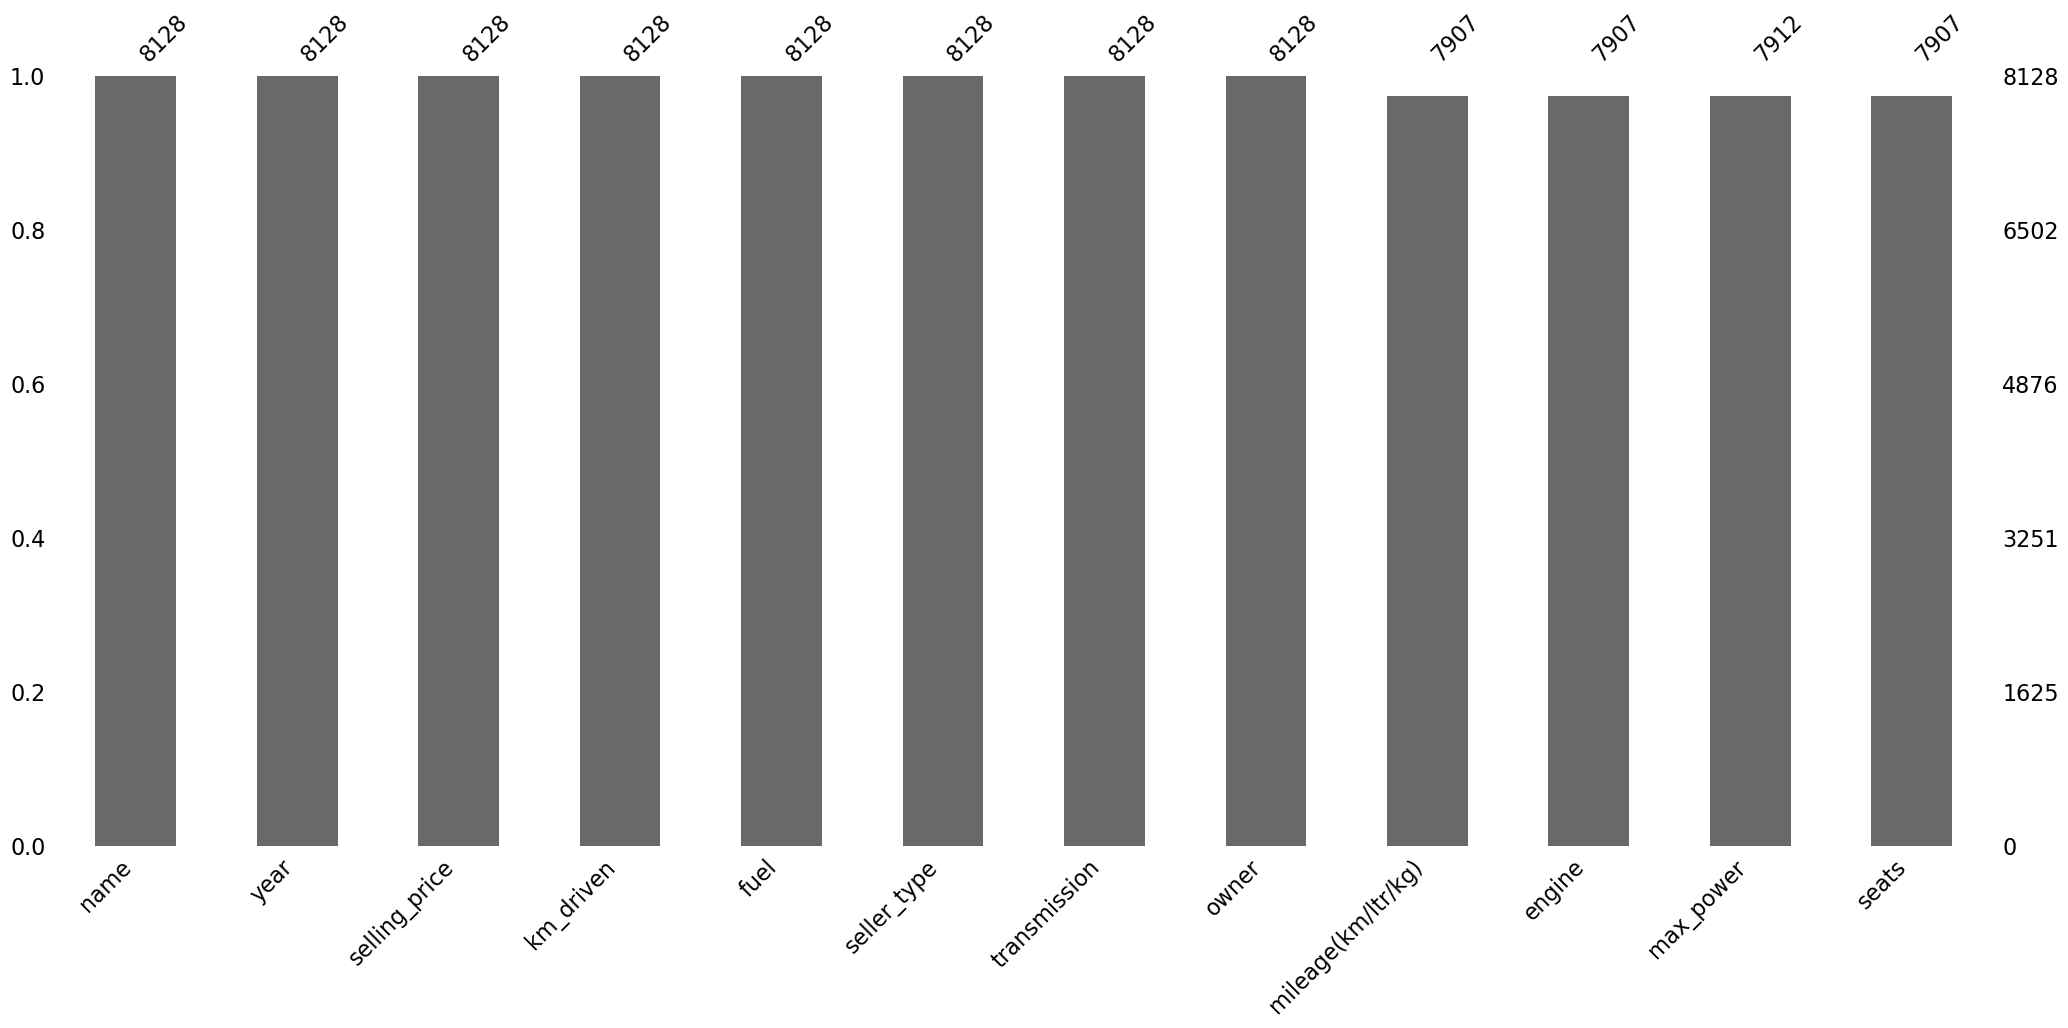

In [16]:
# Visualize missing values
msno.bar(df)

*Percentage of missing values is not great, hence droppping them.*

In [18]:
df = df.dropna()

##### Duplicate values

In [20]:
# Check for duplicate rows

duplicates = df[df.duplicated()]
print(f'{len(duplicates)} are duplicate rows out of {len(df)} ')

1189 are duplicate rows out of 7906 


In [21]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

##### Feature Trasnformation

In [23]:
# Create a new column 'brand' by extracting brand name from 'name' column
df["brand"] = df["name"].apply(lambda x: x.split()[0])

In [24]:
# Create a new column 'age' using 'year' column

# Get the current year
from datetime import datetime
current_year = datetime.now().year

# Calculate age by subtracting manufacturing year from current year
df["age"] = current_year - df["year"]

In [25]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,10
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,10


*Extracting brand names from product names will enhance EDA by revealing brand-specific trends in selling prices. Calculating vehicle age from the manufacturing year allows for a clearer correlation analysis between age and selling price.*

##### Descriptive Statistics 

In [28]:
# Display descriptive statistics of the DataFrame
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,age
count,6717,6717.000000,6.717000e+03,6.717000e+03,6717,6717,6717,6717,6717.000000,6717.000000,6717.000000,6717.000000,6717,6717.000000
unique,1982,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,31,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,Maruti,NaN
freq,118,NaN,NaN,NaN,3658,6024,6142,4176,NaN,NaN,NaN,NaN,2089,NaN
mean,NaN,2013.611136,5.263860e+05,7.339834e+04,NaN,NaN,NaN,NaN,19.466585,1430.985857,87.766100,5.434271,NaN,10.388864
std,NaN,3.897402,5.235504e+05,5.870328e+04,NaN,NaN,NaN,NaN,4.048102,493.469198,31.724555,0.983805,NaN,3.897402
min,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,32.800000,2.000000,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,3.800000e+04,NaN,NaN,NaN,NaN,16.800000,1197.000000,67.100000,5.000000,NaN,7.000000
50%,NaN,2014.000000,4.200000e+05,6.820300e+04,NaN,NaN,NaN,NaN,19.440000,1248.000000,81.830000,5.000000,NaN,10.000000
75%,NaN,2017.000000,6.500000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.500000,1498.000000,100.000000,5.000000,NaN,13.000000


##### Lists for categorical and numerical columns

In [30]:
# Identify categorical columns
categorical_columns = ["brand", "fuel", "seller_type", "transmission", "owner"]

# Identify numerical columns
numerical_columns =[]

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical_columns.append(column)
        
print("Categorical columns: ", categorical_columns)
print("Numeric columns: ", numerical_columns)


Categorical columns:  ['brand', 'fuel', 'seller_type', 'transmission', 'owner']
Numeric columns:  ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'age']


##### Filtering Data

In [32]:
# Fiter out rows where for years before 2012
df = df[df['year'] >= 2012]

*As cars older than 12 years (beyond their typical lifespan) are less likely to function properly. This ensures the analysis focuses on vehicles within a standard operational range.*

In [34]:
# Drop columns we wouldn't need
df.drop(['name', 'year'], axis=1, inplace=True)

In [35]:
# Remove deleted year from list
numerical_columns.remove('year')

## Univariate analysis

#### 1. Categorical Data

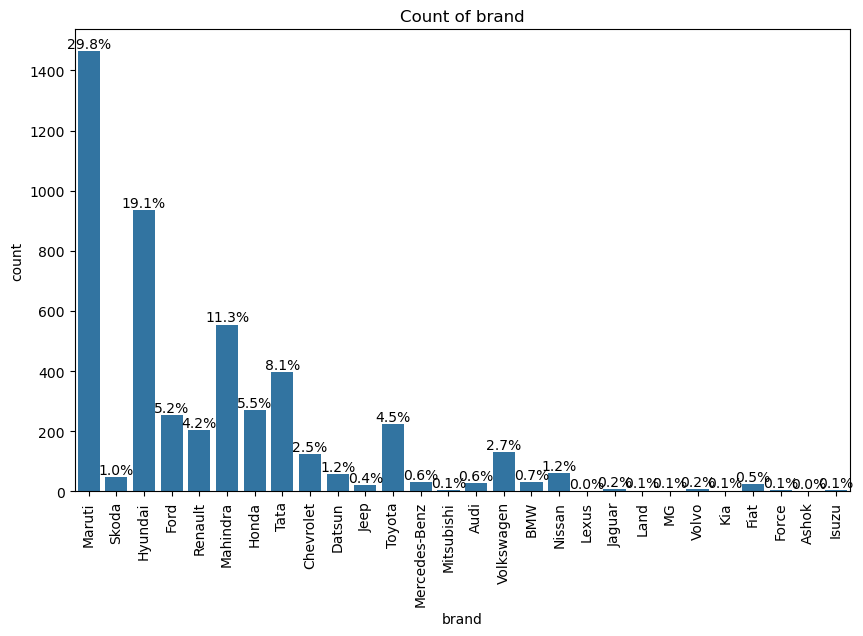

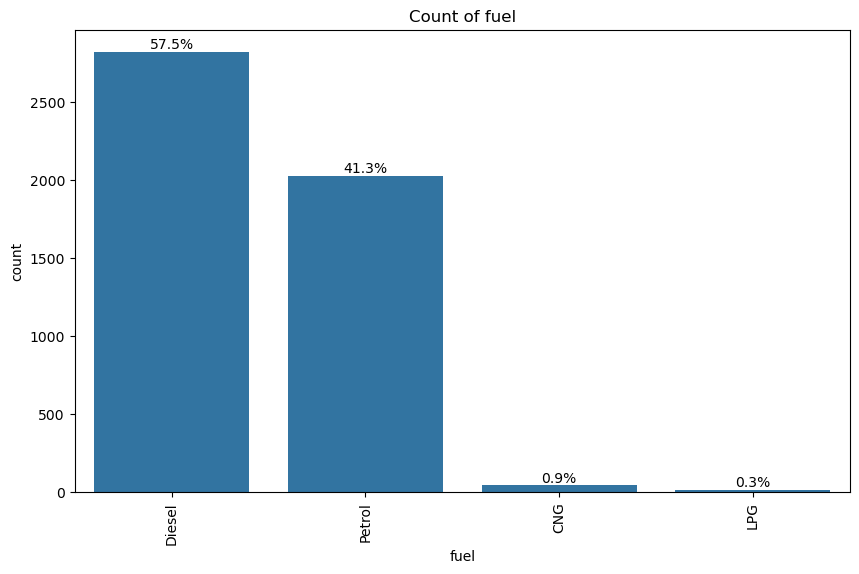

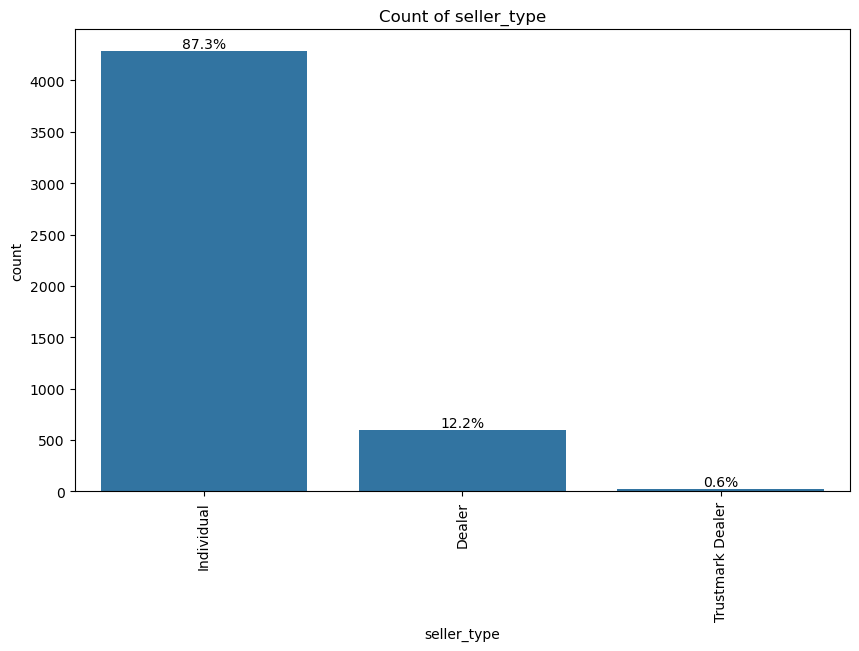

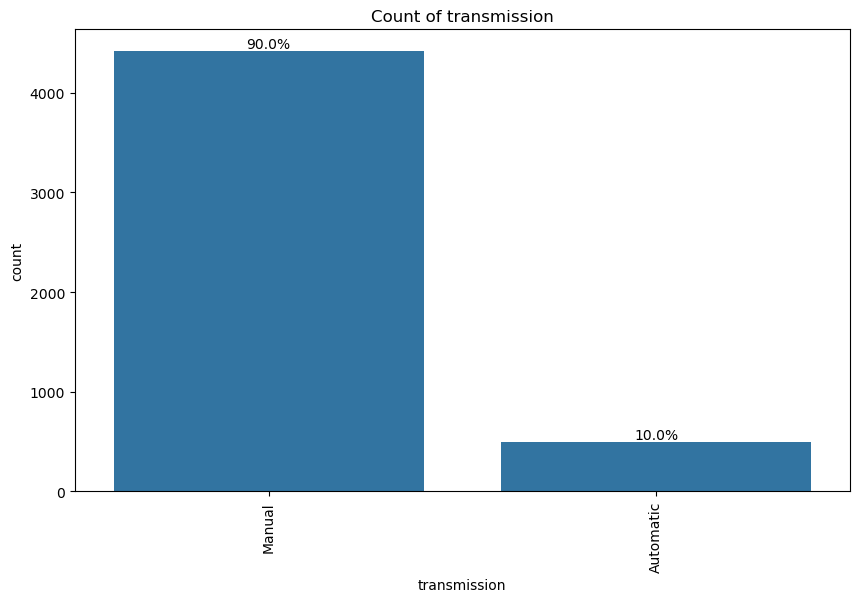

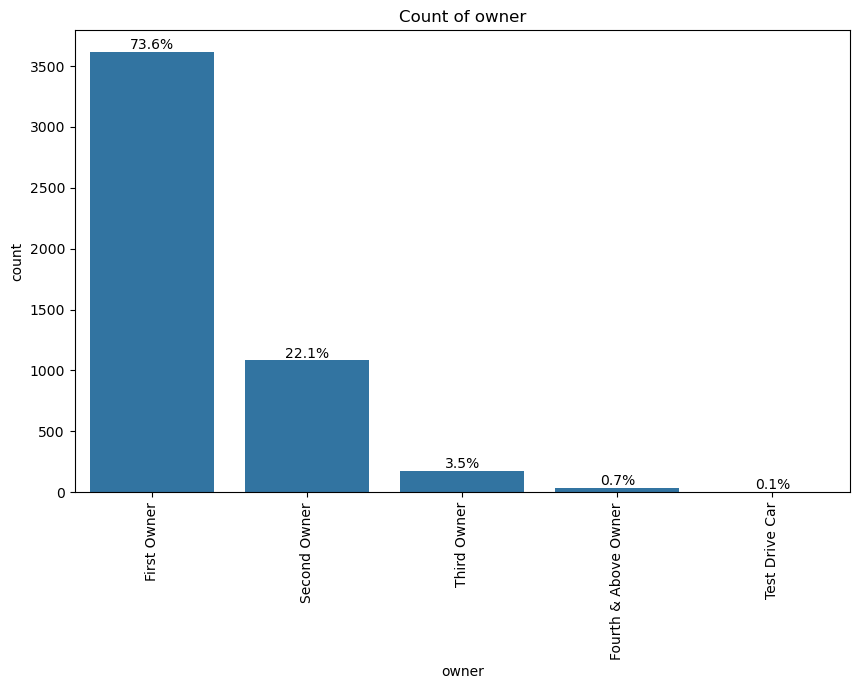

In [38]:
# Visualize count of each category for categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df)
    
    # Calculate and annotate percentages
    total = len(df)
    for p in ax.patches:
        count = p.get_height()
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., count), 
                    ha='center', va='bottom', fontsize=10)

    plt.title(f"Count of {column}")
    plt.xticks(rotation=90)
    plt.show()


1. **Top Car Brands:**  
   Mahindra and Hyundai are among the top three brands dominating the resale market.

2. **Fuel Type Distribution:**  
Diesel cars make up 57% of the resale market, while petrol cars account for 41%. LPG and CNG cars combined contribute less than 2%.ined  

3. **Seller Type:**  
   Individual sellers dominate the resale space, representing 80% of transactions, compared to dealers.

4. **Transmission Preference:**  
   Manual transmission cars constitute 90% of sales for vehicles sold between 2012 and 2020.

5. **Ownership History:**  
   Cars with a single previous owner make up 70% of the resale market.

6. **Feature Transformation:**  
   Categories with minimal market share can be transformed based on their relationship with selling price, identified through bivariate analysis.


#### Numeric Data

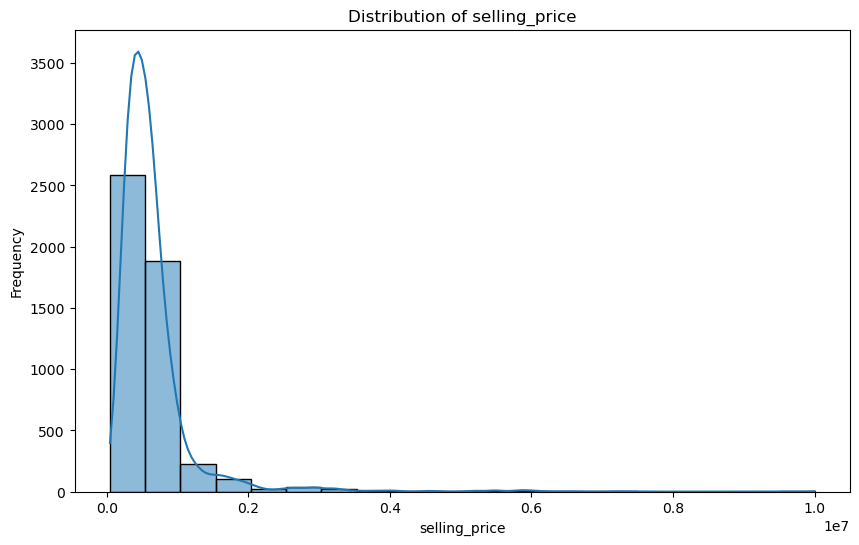

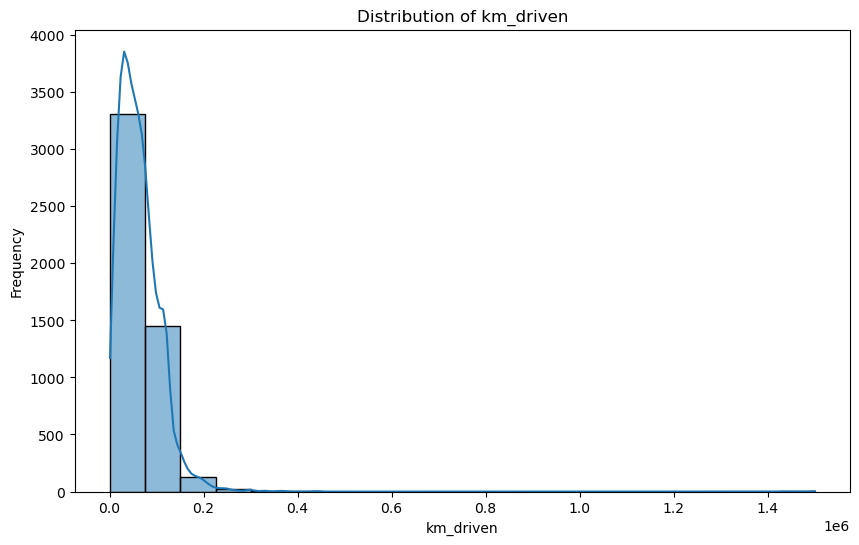

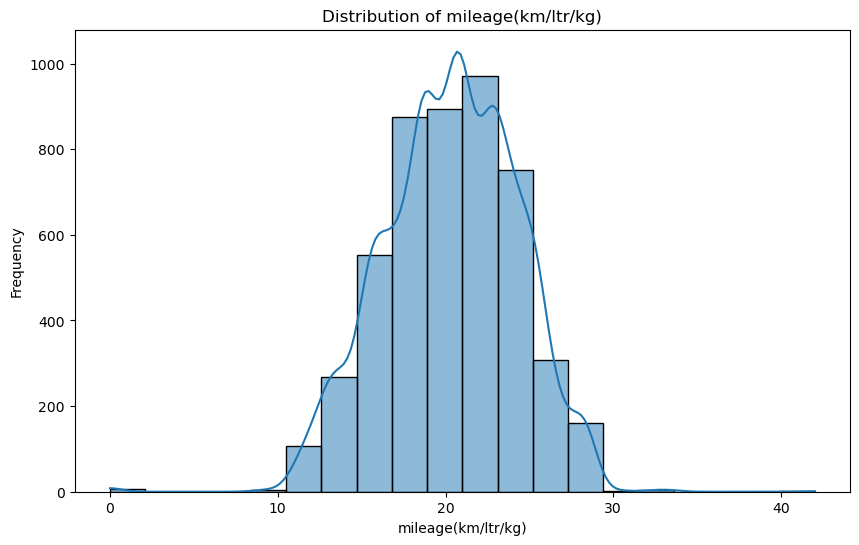

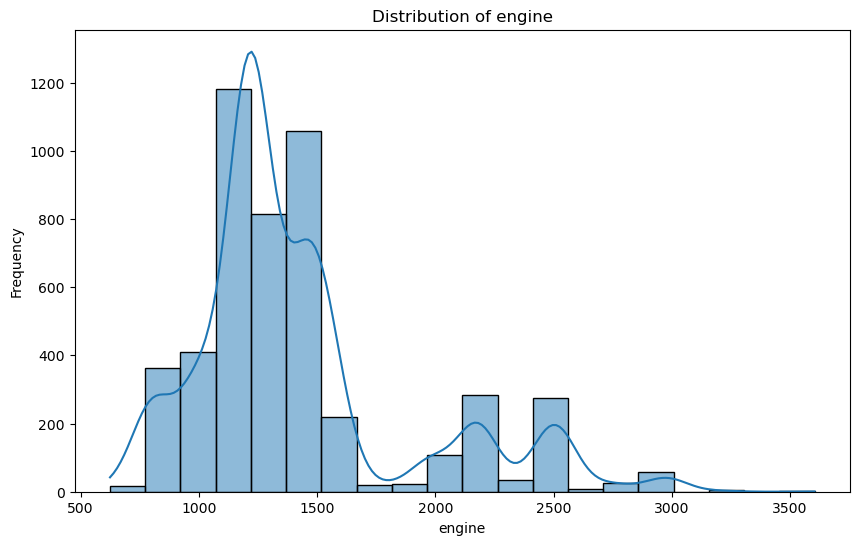

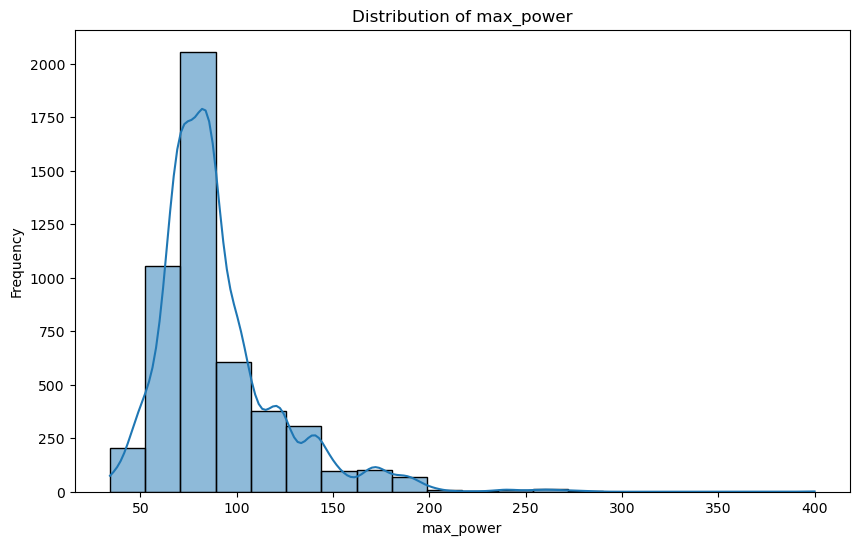

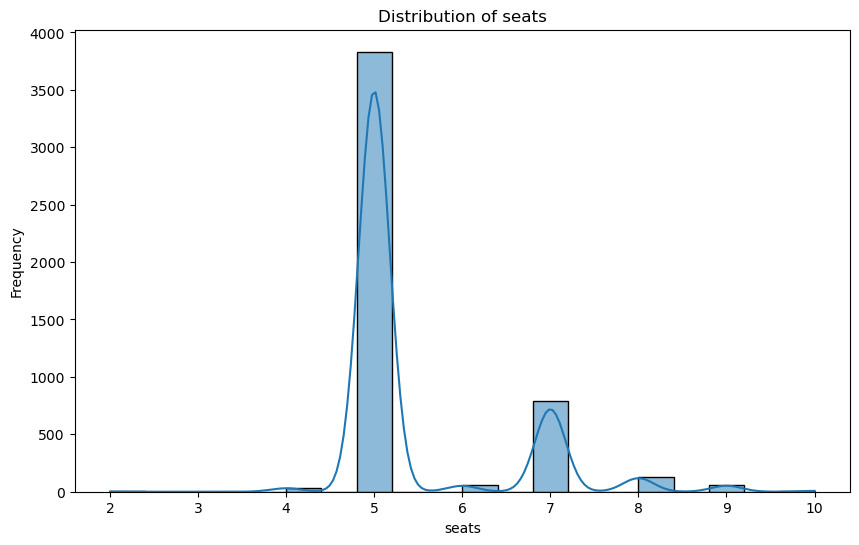

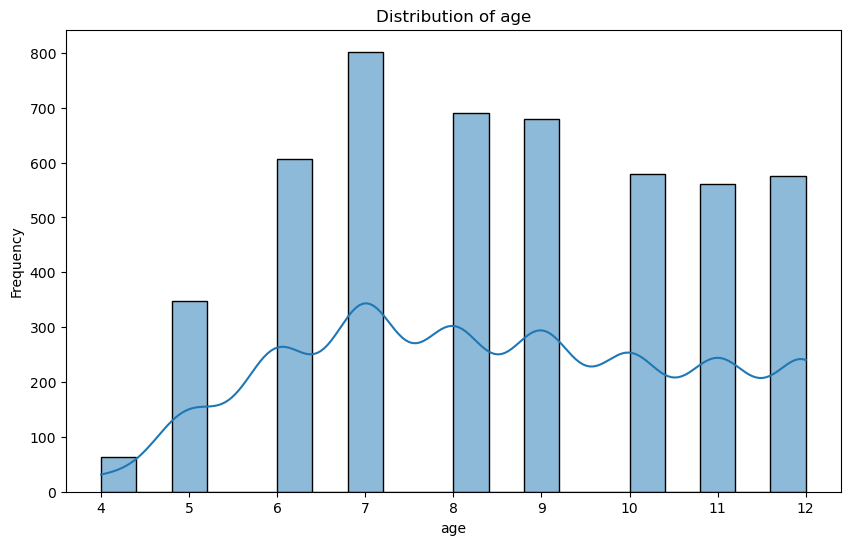

In [41]:
# Visualize distribution of numerical columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=column, data=df, bins=20, kde=True)  # Adjust bins and kde as needed
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


### Insights  
- The **selling price**, **distance covered (kms)**, **engine**, and **maximum power** are skewed. These variables will require scaling during data preprocessing for model building.


## Bivariate Analysis

#### 1. Numeric Data

##### Sactter Plot

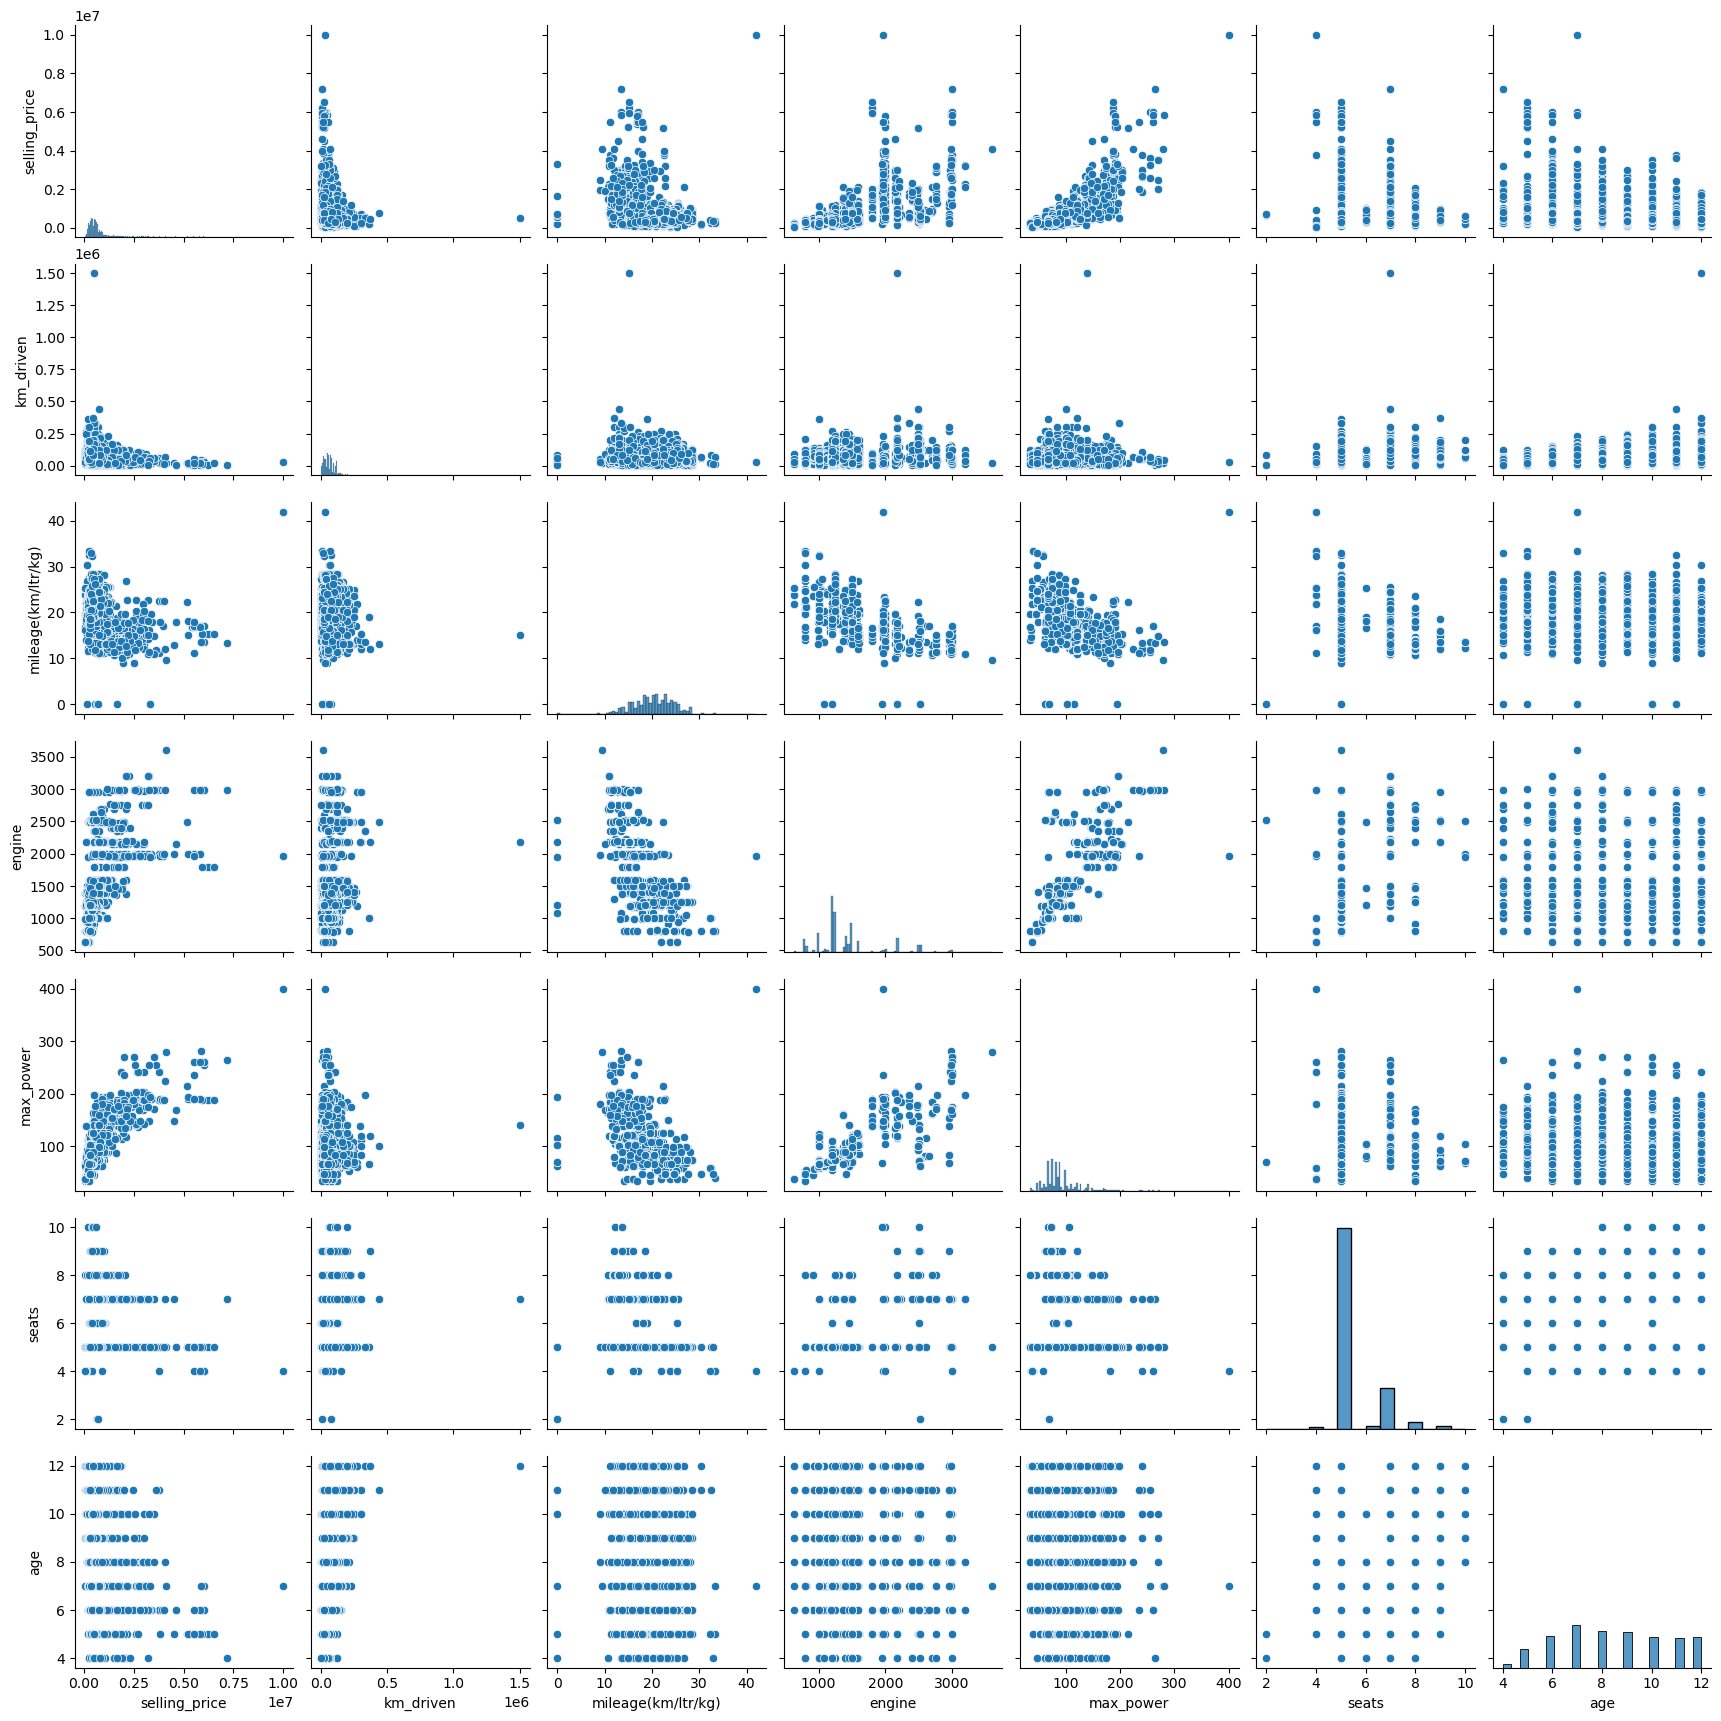

In [46]:
# Visualize pairplot for numerical columns

sns.pairplot(df[numerical_columns])
plt.show()         

##### Heat Map

<function matplotlib.pyplot.show(close=None, block=None)>

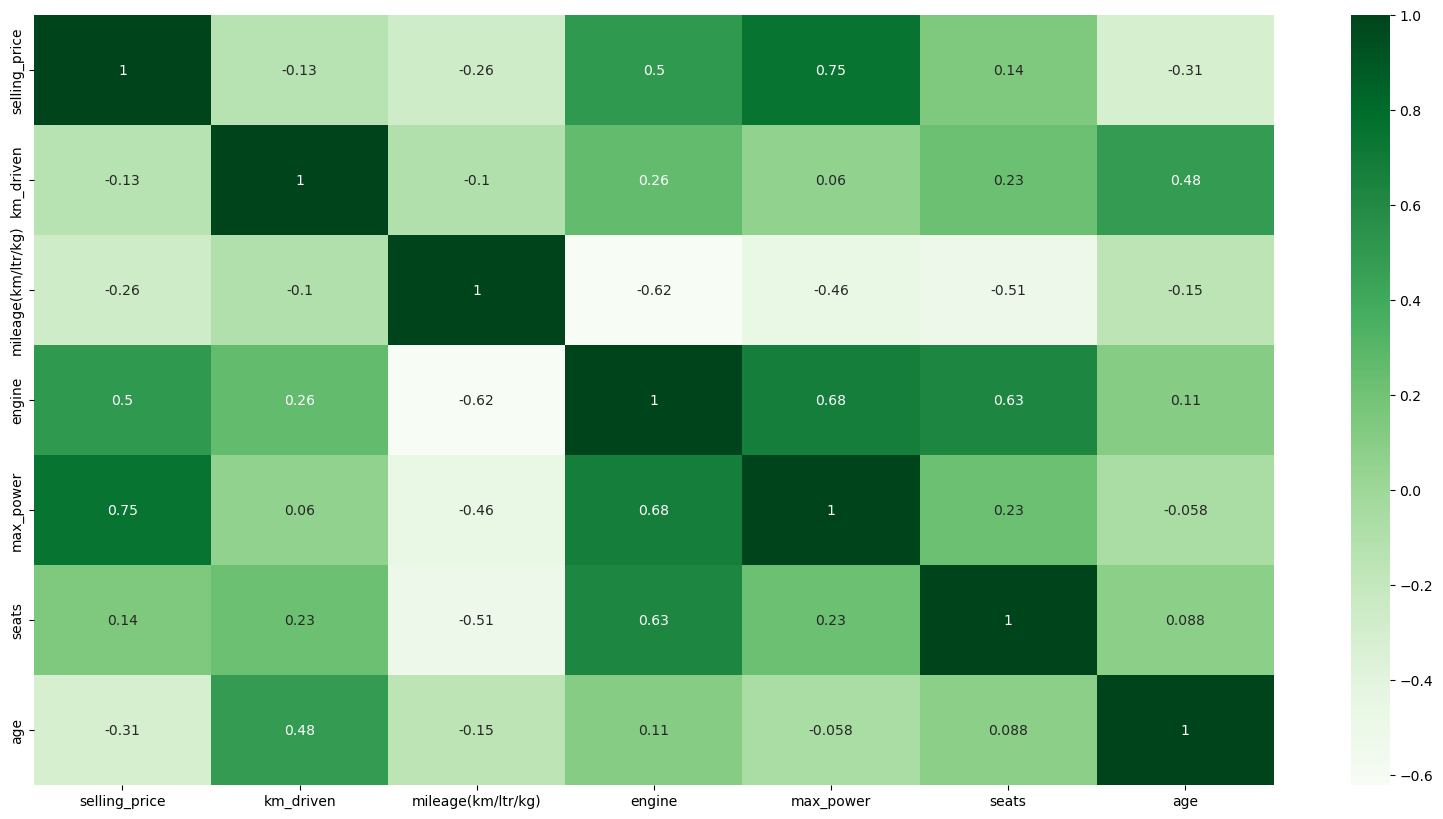

In [48]:
# Calculate correlation matrix
corr_matrix = df[list(numerical_columns)].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=[20, 10])
sns.heatmap(corr_matrix, cmap='Greens', annot=True)
plt.show

#### Key Correlations

- **Selling Price**:  
  - Strongly positive with **max_power** (0.69) and **engine** (0.44).  
  - Negative with **age** (-0.43), indicating depreciation over time.

- **Km Driven**:  
  - Weakly negative with **selling price** (-0.16).  
  - Positive with **age** (0.39), as older cars cover more distance.

- **Max Power**:  
  - Strongly positive with **engine** (0.68) and **selling price** (0.69).  

- **Age**:  
  - Negatively impacts **selling price** (-0.43).  


#### 2. Categorial data 










C:\Users\ANJALI\AppData\Local\Temp\ipykernel_25440\1976480771.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


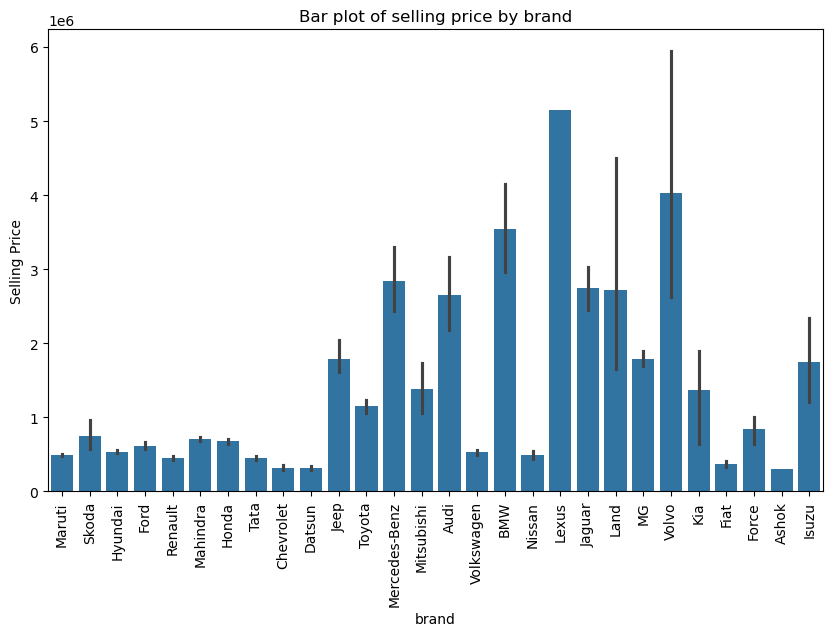

C:\Users\ANJALI\AppData\Local\Temp\ipykernel_25440\1976480771.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


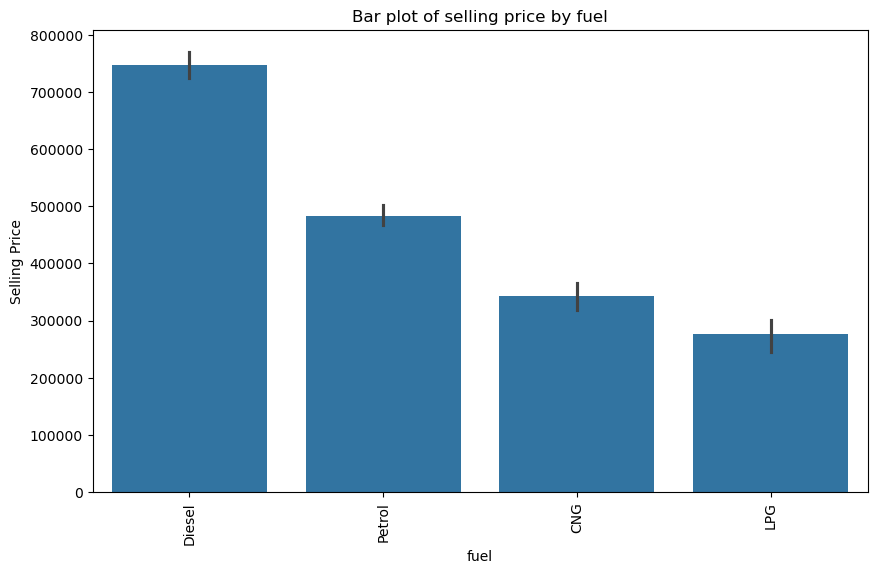

C:\Users\ANJALI\AppData\Local\Temp\ipykernel_25440\1976480771.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


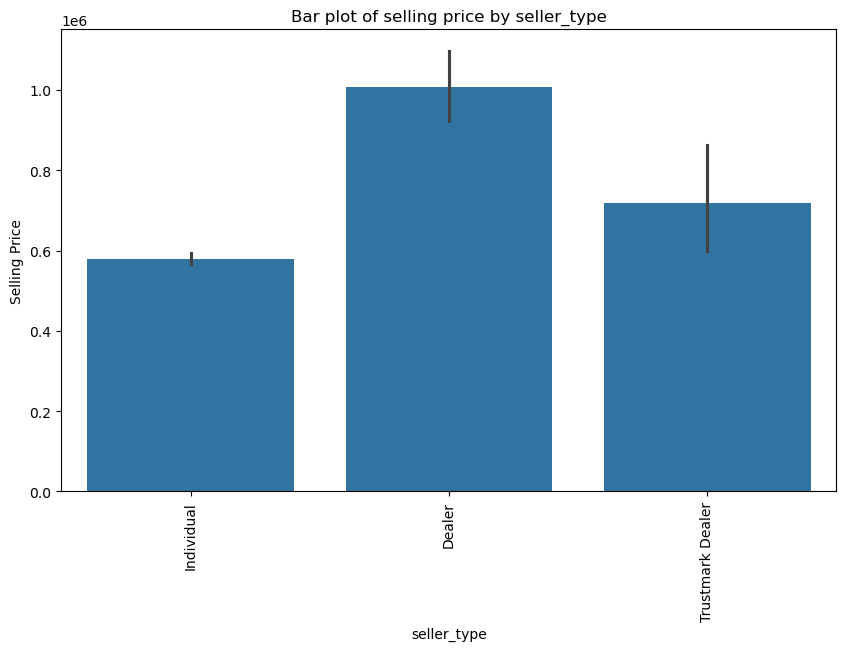

C:\Users\ANJALI\AppData\Local\Temp\ipykernel_25440\1976480771.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


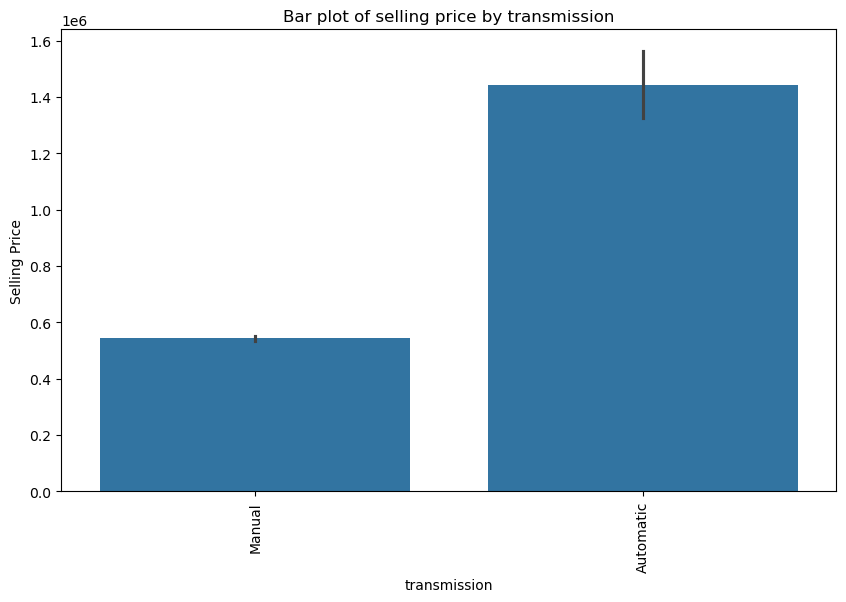

C:\Users\ANJALI\AppData\Local\Temp\ipykernel_25440\1976480771.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


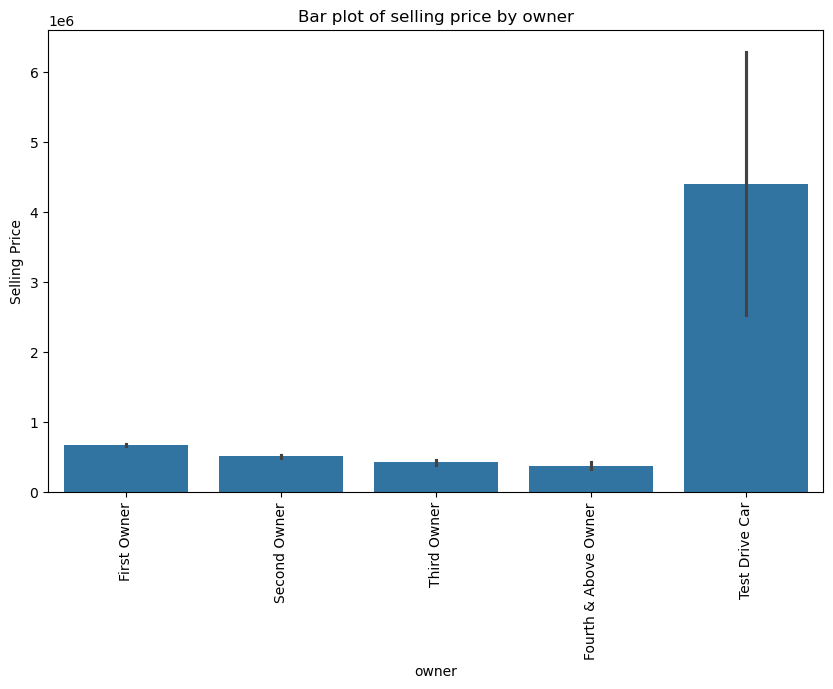

In [51]:
# Visualize average selling price by category for categorical columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=column, y='selling_price', data=df)
    plt.title(f'Bar plot of selling price by {column}')
    plt.xlabel(column)
    plt.ylabel('Selling Price')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


### Insights

- **Wide Price Range:**  
  Car prices span a wide range, from affordable to luxury vehicles.

- **Fuel Type and Pricing:**  
  Diesel and petrol cars are priced in different ranges, while CNG and LPG cars fall in the same range. Combining CNG and LPG during encoding can reduce the number of variables and help avoid multicollinearity issues.

- **Seller Type:**  
  Dealers tend to sell cars at higher prices than individual sellers.

- **Transmission Type:**  
  Automatic cars, though occupying a smaller market share, are sold at hi
  
- **Test Drive Cars:**  
  Test drive cars, though rare in numbe i.e. 0.1% of total cars listedr, are priced approximately 8 times higher than regular cars. While the small sample size makes it difficult to draw conclusions, the significant price difference suggests that these cars are likely in better condition or have other factors that drive up their price.not be ignored.


In [53]:
# Investigating Test Drive Car
df[df['owner'] == 'Test Drive Car']

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,age
4383,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,108.60,5.0,Volkswagen,5
4950,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0,Audi,5
4951,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0,Audi,5
4952,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0,Audi,5
6220,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799.0,139.46,5.0,Honda,5


In [54]:
# Drop rows where the 'owner' column is 'Test Drive Car'
df = df[df['owner'] != 'Test Drive Car']

*The Test Drive Cars listed are m mid-range and luxury cars, but their classification as test drive cars has little to do with their price. Since the bra columnnd is not included in the price prediction model, removing these cars will be beneficia*."

# Data Preprocessing for Model Building

### Target Variable Preprocessing

C:\Users\ANJALI\AppData\Local\Temp\ipykernel_25440\1275977976.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['selling_price'], shade=True)


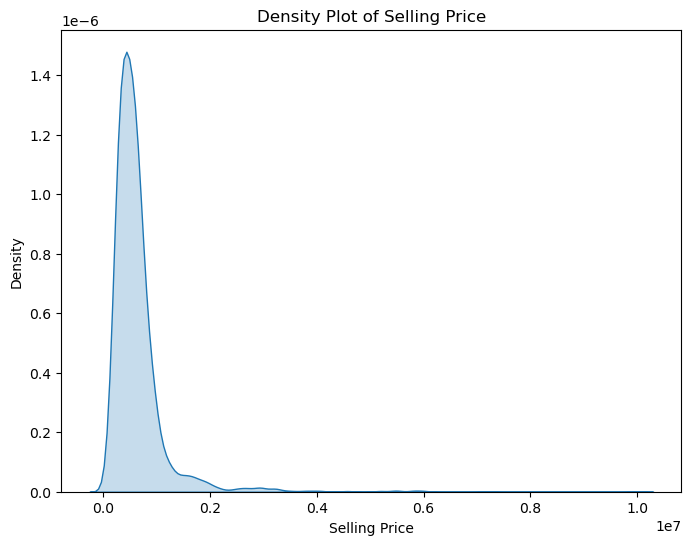

In [58]:
# Plot the density of the target variable
plt.figure(figsize=(8, 6))
sns.kdeplot(df['selling_price'], shade=True)
plt.title('Density Plot of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()


In [59]:
# Calculate skewness of the target variable
from scipy.stats import skew

skew_value = skew(df['selling_price'])
print(f"Skewness of Selling Price: {skew_value}")

Skewness of Selling Price: 5.452573947368445


*Right-tailed distribution with more small values and a few large outliers. It indicates strong positive skew.*

In [61]:
# Calculate kurtosis of the target variable
from scipy.stats import kurtosis

kurt_value = kurtosis(df['selling_price'])
print(f"Kurtosis of Selling Price: {kurt_value}")


Kurtosis of Selling Price: 48.52839408500314


*Suggests an extreme number of outliers.*

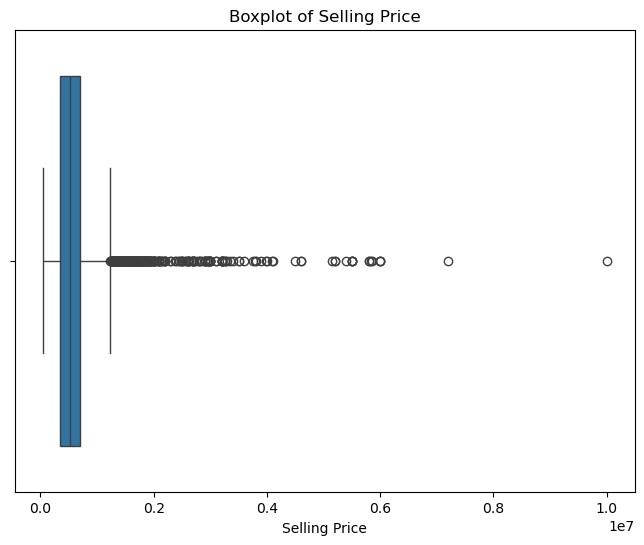

In [63]:
# Boxplot of the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.xlabel('Selling Price')
plt.show()

#### Handle Outliers

In [65]:
df.shape

(4901, 12)

In [66]:
from scipy.stats import zscore
df['z_score'] = zscore(df['selling_price'])

# Filter out outliers (Z-score > 3 or < -3)
df = df[df['z_score'].abs() <= 3]

In [67]:
# Calculate kurtosis of the target variable after removing outliers
from scipy.stats import kurtosis

kurt_value = kurtosis(df['selling_price'])
print(f"Kurtosis of Selling Price: {kurt_value}")

Kurtosis of Selling Price: 4.4303159209141265


*The Z-score value significantly reduced, but it is still not sufficient possibly due to presence of extreme values. If the kurtosis remains high, there may still be more extreme values that are less than 3 standard deviations from the mean.*

#### Handle Skewness

In [70]:
# Use log transformation to handle skewness
df['selling_price_log'] = np.log1p(df['selling_price'])

In [71]:
skew_value = skew(df['selling_price_log'])
print(f"Skewness of Selling Price Log: {skew_value}")

Skewness of Selling Price Log: -0.1092881211202111


In [72]:
# Calculate kurtosis of the target variable after noramlizing data
from scipy.stats import kurtosis

kurt_value = kurtosis(df['selling_price_log'])
print(f"Kurtosis of Selling Price Log: {kurt_value}")

Kurtosis of Selling Price Log: 0.4336869256394147


C:\Users\ANJALI\AppData\Local\Temp\ipykernel_25440\1232005754.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['selling_price_log'], shade=True)


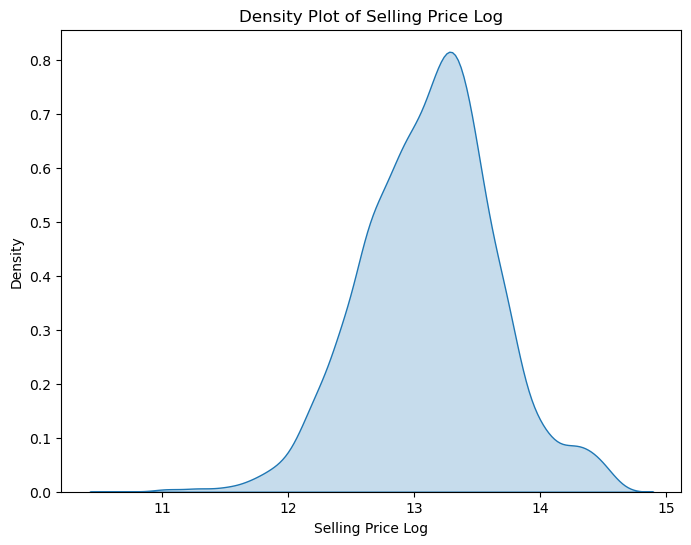

In [73]:
# Plot the density after dealing with the skewness
plt.figure(figsize=(8, 6))
sns.kdeplot(df['selling_price_log'], shade=True)
plt.title('Density Plot of Selling Price Log')
plt.xlabel('Selling Price Log')
plt.ylabel('Density')
plt.show()

In [74]:
df.shape

(4811, 14)

*Since the skewness is now close to 0,the data is approximately normal or symmetric, which is ideal for machine learning algorithms that assume normality (linear regression, XGBoost).*

*The kurtosis value is close to 0, indicating that the data does not have excessive outliers or extreme values in the tails, which helps reduce the influence of any remaining outliers.*

### Feature Variable Preprocessing

In [78]:
# Create list of numerical features
numerical_features = numerical_columns.copy()
numerical_features.remove('selling_price')
print(numerical_features)

['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'age']


In [79]:
# Initialize a cleaned DataFrame with the original data
df_cleaned = df.copy()

# Loop through each numerical column to calculate Z-scores and remove outliers
for col in numerical_features:
    # Calculate Z-scores for the column
    df_cleaned[f'{col}_zscore'] = zscore(df_cleaned[col], nan_policy='omit')
    
    # Remove rows where the Z-score for the current column exceeds 3
    df_cleaned = df_cleaned[df_cleaned[f'{col}_zscore'].abs() <= 3]
    
    # Calculate and print kurtosis after removing outliers
    kurt_value = kurtosis(df_cleaned[col], nan_policy='omit')
    print(f"Kurtosis of {col} after outlier removal: {kurt_value}")

# Drop the Z-score columns after cleaning
zscore_columns = [f'{col}_zscore' for col in numerical_features]
df_cleaned = df_cleaned.drop(columns=zscore_columns)

Kurtosis of km_driven after outlier removal: 0.3048441397864994
Kurtosis of mileage(km/ltr/kg) after outlier removal: -0.5074513357000363
Kurtosis of engine after outlier removal: 1.2341781032164443
Kurtosis of max_power after outlier removal: 0.5888965558843293
Kurtosis of seats after outlier removal: 1.5780546952402634
Kurtosis of age after outlier removal: -1.0359195330692645


In [80]:
df_cleaned = df_cleaned.drop('z_score', axis=1)

In [81]:
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (4811, 14)
Cleaned DataFrame shape: (4574, 13)


In [82]:
df_cleaned

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,age,selling_price_log
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,10,13.017005
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,10,12.821261
5,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,Hyundai,7,12.994532
9,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,Ford,11,12.206078
10,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.0,108.45,5.0,Renault,10,13.122365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,380000,25000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai,11,12.847929
8119,360000,80000,Petrol,Individual,Manual,First Owner,20.51,998.0,67.04,5.0,Maruti,7,12.793862
8121,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,Maruti,11,12.468441
8122,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,Hyundai,10,13.071072


In [83]:
# Display unique values of categorical columns
for column in categorical_columns:
    print(f'{column}: {df_cleaned[column].unique()}')

brand: ['Maruti' 'Skoda' 'Hyundai' 'Ford' 'Renault' 'Mahindra' 'Honda' 'Tata'
 'Chevrolet' 'Datsun' 'Jeep' 'Toyota' 'Mercedes-Benz' 'Volkswagen'
 'Nissan' 'MG' 'Kia' 'Fiat' 'Audi' 'Force' 'Volvo' 'Ashok' 'Isuzu']
fuel: ['Diesel' 'Petrol' 'CNG' 'LPG']
seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: ['Manual' 'Automatic']
owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner']


In [84]:
# Drop columns not needed
df_cleaned.drop(['brand'], axis=1, inplace=True)

In [85]:
# Reduce the categories of ower column
# Create a dictionary to map old categories to new categories
owner_mapping = {
    'First Owner': 'First',
    'Second Owner': 'Second Hand',
    'Third Owner': 'Second Hand',
    'Fourth & Above Owner': 'Second Hand'
}

# Apply the mapping to the 'owner' column
df_cleaned['owner'] = df_cleaned['owner'].map(owner_mapping)

In [86]:
# Reduce the categories of fuel column
# Create a dictionary to map old categories to new categories
fuel_mapping = {
    'Petrol': 'Petrol',
    'Diesel': 'Diesel',
    'LPG': 'LPG/CNG',
    'CNG': 'LPG/CNG'
}

# Apply the mapping to the 'owner' column
df_cleaned['fuel'] = df_cleaned['fuel'].map(fuel_mapping)

In [87]:
# Reduce the categories of seller_type column
# Create a dictionary to map old categories to new categories
seller_mapping = {
    'Individual': 'Individual',
    'Dealer': 'Dealer',
    'Trustmark Dealer': 'Dealer'
}

# Apply the mapping to the 'owner' column
df_cleaned['seller_type'] = df_cleaned['seller_type'].map(seller_mapping)

#### Encoding Categorical Variables

In [89]:
df_1 = pd.get_dummies(df_cleaned)
df_1 = df_1.astype(int)

In [90]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4574 entries, 0 to 8123
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   selling_price           4574 non-null   int32
 1   km_driven               4574 non-null   int32
 2   mileage(km/ltr/kg)      4574 non-null   int32
 3   engine                  4574 non-null   int32
 4   max_power               4574 non-null   int32
 5   seats                   4574 non-null   int32
 6   age                     4574 non-null   int32
 7   selling_price_log       4574 non-null   int32
 8   fuel_Diesel             4574 non-null   int32
 9   fuel_LPG/CNG            4574 non-null   int32
 10  fuel_Petrol             4574 non-null   int32
 11  seller_type_Dealer      4574 non-null   int32
 12  seller_type_Individual  4574 non-null   int32
 13  transmission_Automatic  4574 non-null   int32
 14  transmission_Manual     4574 non-null   int32
 15  owner_First             45

In [91]:
df_1.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,age,selling_price_log,fuel_Diesel,fuel_LPG/CNG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,owner_First,owner_Second Hand
0,450000,145500,23,1248,74,5,10,13,1,0,0,0,1,0,1,1,0
1,370000,120000,21,1498,103,5,10,12,1,0,0,0,1,0,1,0,1
5,440000,45000,20,1197,81,5,7,12,0,0,1,0,1,0,1,1,0
9,200000,169000,20,1399,68,5,11,12,1,0,0,0,1,0,1,1,0
10,500000,68000,19,1461,108,5,10,13,1,0,0,0,1,0,1,0,1


## Target and Feature Variable Creation

### Splitting Dataset into Train and Tet sets

In [95]:
from sklearn.model_selection import train_test_split

X = df_1.drop(columns=['selling_price','selling_price_log'])
y = df_1['selling_price_log']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Re-Scaling features

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building 

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score


# List of models
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso, XGBRegressor]

In [101]:
# Lists to store evaluation metrics
mse = []
rmse = []
evs = []
r_square_score = []

# Loop through each model and calculate performance metrics
for model in models:
    regressor = model().fit(X_train, y_train)
    pred_log = regressor.predict(X_test)
    
    # Calculate metrics
    mse.append(mean_squared_error(y_true=y_test, y_pred=pred_log))
    rmse.append(np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred_log)))
    evs.append(explained_variance_score(y_true=y_test, y_pred=pred_log))
    r_square_score.append(r2_score(y_true=y_test, y_pred=pred_log))

In [102]:
# Display results
results = pd.DataFrame({
    'Model': [model.__name__ for model in models],
    'MSE': mse,
    'RMSE': rmse,
    'Explained Variance Score': evs,
    'R² Score': r_square_score
})

In [103]:
results

,Model,MSE,RMSE,Explained Variance Score,R² Score
0,LinearRegression,0.139195,0.373088,0.568019,0.567631
1,SVR,0.364259,0.603539,0.072820,-0.131467
2,DecisionTreeRegressor,0.182637,0.427360,0.432696,0.432692
3,RandomForestRegressor,0.104562,0.323360,0.675324,0.675209
4,Ridge,0.139193,0.373086,0.568026,0.567637
5,Lasso,0.190809,0.436816,0.407328,0.407308
6,XGBRegressor,0.104239,0.322860,0.676798,0.676212


*The RandomForestRegressor is picked since it has the highest R2 score and the least RMSE.*

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [106]:
# Initialize the model
rf = RandomForestRegressor(random_state=42)

In [107]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

In [108]:
# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE from GridSearchCV: ", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE from GridSearchCV:  0.32155427297682826


In [109]:
# Train and evaluate the best model
best_rf = grid_search.best_estimator_

# Predictions for training and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [110]:
# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training R²: {train_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")

# Calculate metrics for test set
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Training R²: 0.8331
Training RMSE: 0.2372
Test R²: 0.7038
Test RMSE: 0.3088


# Residual Analysis

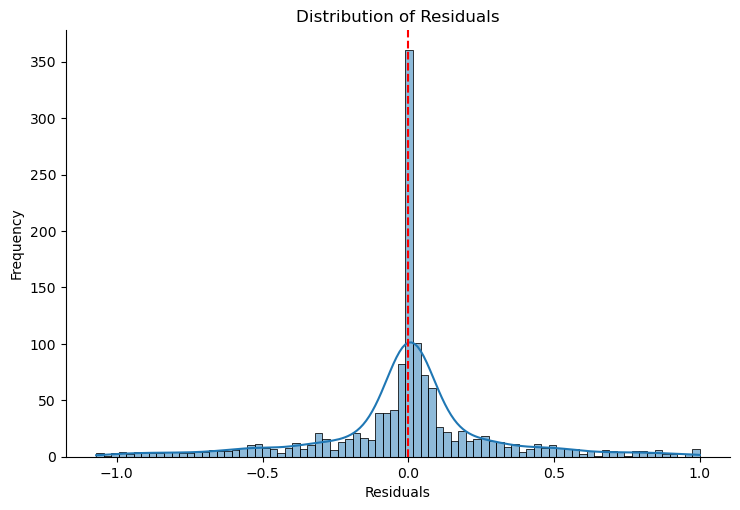

In [112]:
# Calculate residuals for the test set
residuals = y_test - y_test_pred

# Plot the distribution of residuals
sns.displot(residuals, kde=True, height=5, aspect=1.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Add a vertical line at zero for reference
plt.show()

The residuals follow the normal distribution, we'll move forward with the model deployment. 

# Model Deployment

In [115]:
# Pickle File Generation 
import joblib  
joblib.dump(best_rf, 'car_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']